In [1]:
#!pip install h2o  

In [2]:
!nvidia-smi

Sun Apr 10 14:55:11 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 462.30       Driver Version: 462.30       CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  GeForce GTX 1650   WDDM  | 00000000:01:00.0  On |                  N/A |
| N/A   41C    P8     2W /  N/A |    549MiB /  4096MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
import h2o  
from h2o.automl import H2OAutoML 
import pandas as pd
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [4]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) Client VM (build 25.311-b11, mixed mode)
  Starting server from C:\Users\aishw\anaconda3\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\aishw\AppData\Local\Temp\tmp1t760e83
  JVM stdout: C:\Users\aishw\AppData\Local\Temp\tmp1t760e83\h2o_aishw_started_from_python.out
  JVM stderr: C:\Users\aishw\AppData\Local\Temp\tmp1t760e83\h2o_aishw_started_from_python.err
  Server is running at http://127.0.0.1:54329
Connecting to H2O server at http://127.0.0.1:54329 ... successful.


H2O_cluster_uptime:,05 secs
H2O_cluster_timezone:,America/New_York
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.0.4
H2O_cluster_version_age:,10 days
H2O_cluster_name:,H2O_from_python_aishw_0cq7br
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,241.8 Mb
H2O_cluster_total_cores:,12
H2O_cluster_allowed_cores:,12
H2O_cluster_status:,"locked, healthy"


In [5]:
dataset = pd.read_csv('in-vehicle-coupon-recommendation.csv')

For H2O to consider the data for classification model, converting the target varible to categorical as suggested in their documents.


Therefore, replacing 0->No and 1->Yes

In [6]:
dataset.loc[dataset['Y'] == 0, 'Y'] = 'No'
dataset.loc[dataset['Y'] == 1, 'Y'] = 'Yes'

In [7]:
hf_dataset = h2o.H2OFrame(dataset)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [8]:
hf_dataset.types

{'destination': 'enum',
 'passanger': 'enum',
 'weather': 'enum',
 'temperature': 'int',
 'time': 'enum',
 'coupon': 'enum',
 'expiration': 'enum',
 'gender': 'enum',
 'age': 'int',
 'maritalStatus': 'enum',
 'has_children': 'int',
 'education': 'enum',
 'occupation': 'enum',
 'income': 'enum',
 'car': 'enum',
 'Bar': 'enum',
 'CoffeeHouse': 'enum',
 'CarryAway': 'enum',
 'RestaurantLessThan20': 'enum',
 'Restaurant20To50': 'enum',
 'toCoupon_GEQ5min': 'int',
 'toCoupon_GEQ15min': 'int',
 'toCoupon_GEQ25min': 'int',
 'direction_same': 'int',
 'direction_opp': 'int',
 'Y': 'enum'}

In [9]:
hf_dataset.describe()

Rows:12684
Cols:26




,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
type,enum,enum,enum,int,enum,enum,enum,enum,int,enum,int,enum,enum,enum,enum,enum,enum,enum,enum,enum,int,int,int,int,int,enum
mins,,,,30.0,,,,,21.0,,0.0,,,,,,,,,,1.0,0.0,0.0,0.0,0.0,
mean,,,,63.30179754020796,,,,,29.887815247850103,,0.4141438032166509,,,,,,,,,,1.0,0.5614947965941344,0.11912645853043204,0.21475875118259224,0.7852412488174078,
maxs,,,,80.0,,,,,46.0,,1.0,,,,,,,,,,1.0,1.0,1.0,1.0,1.0,
sigma,,,,19.15448575684057,,,,,7.697275065801651,,0.49259297975549976,,,,,,,,,,0.0,0.4962235416149696,0.3239500256352581,0.41067106826403527,0.41067106826403527,
zeros,,,,0,,,,,0,,7431,,,,,,,,,,0,5562,11173,9960,2724,
missing,0,0,0,0,0,0,0,0,2335,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,No Urgent Place,Alone,Sunny,55.0,2PM,Restaurant(<20),1d,Female,21.0,Unmarried partner,1.0,Some college - no degree,Unemployed,$37500 - $49999,nan,never,never,nan,4~8,1~3,1.0,0.0,0.0,0.0,1.0,Yes
1,No Urgent Place,Friend(s),Sunny,80.0,10AM,Coffee House,2h,Female,21.0,Unmarried partner,1.0,Some college - no degree,Unemployed,$37500 - $49999,nan,never,never,nan,4~8,1~3,1.0,0.0,0.0,0.0,1.0,No
2,No Urgent Place,Friend(s),Sunny,80.0,10AM,Carry out & Take away,2h,Female,21.0,Unmarried partner,1.0,Some college - no degree,Unemployed,$37500 - $49999,nan,never,never,nan,4~8,1~3,1.0,1.0,0.0,0.0,1.0,Yes


- H2O is good at handling categorical variables itself.
- Though it might not simulatenously do feature engineering while training the model, it can provide top estimators which can be used for future training.

In [10]:
train, test = hf_dataset.split_frame(ratios=[0.7],seed=1)
#train_test_split(hf_dataset, test_size=0.3)

In [11]:
y = "Y"
x = hf_dataset.columns
x.remove(y)

In [12]:
h2o_aml = H2OAutoML(max_models = 12, seed = 1, exclude_algos = ["StackedEnsemble"], verbosity="info") #max_runtime_secs=120,

In [13]:
h2o_aml.train(x = x, y = y, training_frame = train)

AutoML progress: |
14:55:52.510: Project: AutoML_1_20220410_145552
14:55:52.510: 5-fold cross-validation will be used.
14:55:52.527: Setting stopping tolerance adaptively based on the training frame: 0.010586308687986653
14:55:52.527: Build control seed: 1
14:55:52.527: training frame: Frame key: AutoML_1_20220410_145552_training_py_2_sid_baa5    cols: 26    rows: 8923  chunks: 1    size: 180353  checksum: -921353519577463880
14:55:52.527: validation frame: NULL
14:55:52.527: leaderboard frame: NULL
14:55:52.527: blending frame: NULL
14:55:52.527: response column: Y
14:55:52.527: fold column: null
14:55:52.527: weights column: null
14:55:52.543: AutoML: XGBoost is not available; skipping it.
14:55:52.560: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (6g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g,

,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,63.0,63.0,133805.0,8.0,8.0,8.0,92.0,204.0,164.77777




ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.06224337087853132
RMSE: 0.24948621380455338
LogLoss: 0.24518146669511676
Mean Per-Class Error: 0.05395037708035364
AUC: 0.9900495745372433
AUCPR: 0.9925299362250726
Gini: 0.9800991490744866

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5369473349054472: 


,,No,Yes,Error,Rate
0,No,3574.0,260.0,0.0678,(260.0/3834.0)
1,Yes,204.0,4885.0,0.0401,(204.0/5089.0)
2,Total,3778.0,5145.0,0.052,(464.0/8923.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.536947,0.954661,199.0
1,max f2,0.425653,0.967941,233.0
2,max f0point5,0.646316,0.963492,163.0
3,max accuracy,0.536947,0.948000,199.0
4,max precision,0.989596,1.000000,0.0
5,max recall,0.180886,1.000000,323.0
6,max specificity,0.989596,1.000000,0.0
7,max absolute_mcc,0.577821,0.893797,186.0
8,max min_per_class_accuracy,0.566941,0.946531,189.0
9,max mean_per_class_accuracy,0.577821,0.948231,186.0



Gains/Lift Table: Avg response rate: 57.03 %, avg score: 57.07 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010086,0.973103,1.753390,1.753390,1.000000,0.978350,1.000000,0.978350,0.017685,0.017685,75.338966,75.338966,0.017685
1,2,0.020061,0.967396,1.753390,1.753390,1.000000,0.970242,1.000000,0.974318,0.017489,0.035174,75.338966,75.338966,0.035174
2,3,0.030035,0.962769,1.753390,1.753390,1.000000,0.965259,1.000000,0.971310,0.017489,0.052663,75.338966,75.338966,0.052663
3,4,0.040009,0.959160,1.753390,1.753390,1.000000,0.961093,1.000000,0.968763,0.017489,0.070151,75.338966,75.338966,0.070151
4,5,0.050095,0.954403,1.753390,1.753390,1.000000,0.956977,1.000000,0.966390,0.017685,0.087837,75.338966,75.338966,0.087837
5,6,0.100078,0.936490,1.753390,1.753390,1.000000,0.945254,1.000000,0.955834,0.087640,0.175477,75.338966,75.338966,0.175477
6,7,0.150062,0.919431,1.753390,1.753390,1.000000,0.927763,1.000000,0.946484,0.087640,0.263117,75.338966,75.338966,0.263117
7,8,0.200045,0.902167,1.753390,1.753390,1.000000,0.910976,1.000000,0.937612,0.087640,0.350757,75.338966,75.338966,0.350757
8,9,0.300011,0.855738,1.751424,1.752735,0.998879,0.880156,0.999626,0.918467,0.175084,0.525840,75.142398,75.273468,0.525579
9,10,0.399978,0.787816,1.737664,1.748968,0.991031,0.825398,0.997478,0.895206,0.173708,0.699548,73.766420,74.896812,0.697201




ModelMetricsBinomial: gbm
** Reported on cross-validation data. **

MSE: 0.16313896442222586
RMSE: 0.4039046476858441
LogLoss: 0.49636383101725634
Mean Per-Class Error: 0.26436775423543346
AUC: 0.8329689277342183
AUCPR: 0.8544880910485577
Gini: 0.6659378554684365

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3937313849712073: 


,,No,Yes,Error,Rate
0,No,2234.0,1600.0,0.4173,(1600.0/3834.0)
1,Yes,567.0,4522.0,0.1114,(567.0/5089.0)
2,Total,2801.0,6122.0,0.2429,(2167.0/8923.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.393731,0.806708,255.0
1,max f2,0.175521,0.887495,333.0
2,max f0point5,0.636804,0.794782,160.0
3,max accuracy,0.478193,0.763981,221.0
4,max precision,0.963904,0.977679,8.0
5,max recall,0.022369,1.000000,396.0
6,max specificity,0.986679,0.999739,0.0
7,max absolute_mcc,0.478193,0.514034,221.0
8,max min_per_class_accuracy,0.592297,0.752999,179.0
9,max mean_per_class_accuracy,0.562544,0.754523,190.0



Gains/Lift Table: Avg response rate: 57.03 %, avg score: 57.52 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010086,0.973199,1.694943,1.694943,0.966667,0.978352,0.966667,0.978352,0.017096,0.017096,69.494334,69.494334,0.016313
1,2,0.020061,0.965913,1.713988,1.704412,0.977528,0.969387,0.972067,0.973895,0.017096,0.034191,71.398765,70.441230,0.032887
2,3,0.030035,0.960430,1.674586,1.694507,0.955056,0.963018,0.966418,0.970283,0.016703,0.050894,67.458563,69.450718,0.048547
3,4,0.040009,0.955476,1.694287,1.694452,0.966292,0.957937,0.966387,0.967205,0.016899,0.067793,69.428664,69.445220,0.064663
4,5,0.050095,0.950326,1.578051,1.671016,0.900000,0.952779,0.953020,0.964300,0.015917,0.083710,57.805070,67.101565,0.078233
5,6,0.100078,0.925855,1.607929,1.639508,0.917040,0.938077,0.935050,0.951203,0.080369,0.164079,60.792909,63.950769,0.148952
6,7,0.150062,0.902923,1.584341,1.621132,0.903587,0.914236,0.924571,0.938890,0.079190,0.243270,58.434088,62.113249,0.216927
7,8,0.200045,0.879188,1.493919,1.589347,0.852018,0.891869,0.906443,0.927141,0.074671,0.317941,49.391944,58.934705,0.274383
8,9,0.300011,0.818619,1.460503,1.546415,0.832960,0.850527,0.881957,0.901613,0.146001,0.463942,46.050283,54.641502,0.381521
9,10,0.399978,0.737320,1.336665,1.493992,0.762332,0.779326,0.852059,0.871050,0.133622,0.597563,33.666477,49.399215,0.459848




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.760171,0.009153,0.745098,0.766947,0.758543,0.762892,0.767377
1,auc,0.833303,0.007129,0.824434,0.832384,0.837750,0.842673,0.829275
2,err,0.239829,0.009153,0.254902,0.233053,0.241457,0.237108,0.232623
3,err_count,428.000000,16.401220,455.000000,416.000000,431.000000,423.000000,415.000000
4,f0point5,0.767138,0.010405,0.756892,0.770944,0.756885,0.769606,0.781365
5,f1,0.808959,0.005641,0.804972,0.812274,0.806118,0.817279,0.804153
6,f2,0.855924,0.016245,0.859575,0.858287,0.862202,0.871247,0.828310
7,lift_top_group,1.695620,0.096212,1.711409,1.769078,1.801211,1.623207,1.573192
8,logloss,0.496664,0.009825,0.505383,0.499969,0.492935,0.481316,0.503717
9,max_per_class_error,0.413860,0.052982,0.473046,0.395619,0.423174,0.443700,0.333763



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2022-04-10 15:07:08,7.601 sec,0.0,0.495030,0.683223,0.500000,0.570324,1.00000,0.429676
1,,2022-04-10 15:07:09,7.781 sec,5.0,0.437207,0.571839,0.895707,0.915887,1.75339,0.185924
2,,2022-04-10 15:07:09,7.964 sec,10.0,0.398025,0.498874,0.917214,0.934701,1.75339,0.168329
3,,2022-04-10 15:07:09,8.165 sec,15.0,0.371874,0.449852,0.929672,0.945231,1.75339,0.152975
4,,2022-04-10 15:07:09,8.346 sec,20.0,0.351477,0.412428,0.943204,0.956803,1.75339,0.135493
5,,2022-04-10 15:07:09,8.553 sec,25.0,0.333817,0.380954,0.954502,0.965480,1.75339,0.121372
6,,2022-04-10 15:07:10,8.747 sec,30.0,0.318124,0.353700,0.963663,0.972692,1.75339,0.104785
7,,2022-04-10 15:07:10,8.930 sec,35.0,0.304304,0.330346,0.970657,0.977970,1.75339,0.094699
8,,2022-04-10 15:07:10,9.130 sec,40.0,0.292737,0.311643,0.975880,0.981887,1.75339,0.084165
9,,2022-04-10 15:07:10,9.330 sec,45.0,0.281107,0.292877,0.980455,0.985381,1.75339,0.076208



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,occupation,1355.537476,1.000000,0.168698
1,coupon,1219.794800,0.899861,0.151805
2,income,922.989868,0.680903,0.114867
3,CoffeeHouse,508.393402,0.375049,0.063270
4,Bar,452.010590,0.333455,0.056253
5,time,437.578949,0.322808,0.054457
6,Restaurant20To50,355.315826,0.262122,0.044219
7,education,339.781769,0.250662,0.042286
8,CarryAway,316.413086,0.233423,0.039378
9,RestaurantLessThan20,277.189484,0.204487,0.034496



See the whole table with table.as_data_frame()


In [14]:
# Get the top model of leaderboard
se = h2o_aml.leader

h2o_lb = h2o_aml.leaderboard
h2o_lb.head(rows = h2o_lb.nrows)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GBM_3_AutoML_1_20220410_145552,0.832969,0.496364,0.854488,0.264368,0.403905,0.163139
GBM_2_AutoML_1_20220410_145552,0.830304,0.500091,0.854069,0.277211,0.405795,0.16467
GBM_4_AutoML_1_20220410_145552,0.828468,0.504062,0.849308,0.28263,0.407222,0.16583
GBM_5_AutoML_1_20220410_145552,0.826225,0.504901,0.851502,0.272737,0.408461,0.16684
GBM_1_AutoML_1_20220410_145552,0.822378,0.50972,0.848255,0.282427,0.410845,0.168794
DRF_1_AutoML_1_20220410_145552,0.820585,0.519452,0.842534,0.275445,0.41424,0.171595
GBM_grid_1_AutoML_1_20220410_145552_model_1,0.819491,0.514067,0.845072,0.278584,0.412298,0.169989
GBM_grid_1_AutoML_1_20220410_145552_model_2,0.805816,0.531408,0.834393,0.296549,0.421001,0.177242
XRT_1_AutoML_1_20220410_145552,0.797796,0.566645,0.823639,0.293283,0.437973,0.19182
DeepLearning_grid_1_AutoML_1_20220410_145552_model_1,0.780768,0.597969,0.807589,0.318503,0.438982,0.192705


In [16]:
se

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_3_AutoML_1_20220410_145552


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,63.0,63.0,133805.0,8.0,8.0,8.0,92.0,204.0,164.77777




ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.06224337087853132
RMSE: 0.24948621380455338
LogLoss: 0.24518146669511676
Mean Per-Class Error: 0.05395037708035364
AUC: 0.9900495745372433
AUCPR: 0.9925299362250726
Gini: 0.9800991490744866

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5369473349054472: 


,,No,Yes,Error,Rate
0,No,3574.0,260.0,0.0678,(260.0/3834.0)
1,Yes,204.0,4885.0,0.0401,(204.0/5089.0)
2,Total,3778.0,5145.0,0.052,(464.0/8923.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.536947,0.954661,199.0
1,max f2,0.425653,0.967941,233.0
2,max f0point5,0.646316,0.963492,163.0
3,max accuracy,0.536947,0.948000,199.0
4,max precision,0.989596,1.000000,0.0
5,max recall,0.180886,1.000000,323.0
6,max specificity,0.989596,1.000000,0.0
7,max absolute_mcc,0.577821,0.893797,186.0
8,max min_per_class_accuracy,0.566941,0.946531,189.0
9,max mean_per_class_accuracy,0.577821,0.948231,186.0



Gains/Lift Table: Avg response rate: 57.03 %, avg score: 57.07 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010086,0.973103,1.753390,1.753390,1.000000,0.978350,1.000000,0.978350,0.017685,0.017685,75.338966,75.338966,0.017685
1,2,0.020061,0.967396,1.753390,1.753390,1.000000,0.970242,1.000000,0.974318,0.017489,0.035174,75.338966,75.338966,0.035174
2,3,0.030035,0.962769,1.753390,1.753390,1.000000,0.965259,1.000000,0.971310,0.017489,0.052663,75.338966,75.338966,0.052663
3,4,0.040009,0.959160,1.753390,1.753390,1.000000,0.961093,1.000000,0.968763,0.017489,0.070151,75.338966,75.338966,0.070151
4,5,0.050095,0.954403,1.753390,1.753390,1.000000,0.956977,1.000000,0.966390,0.017685,0.087837,75.338966,75.338966,0.087837
5,6,0.100078,0.936490,1.753390,1.753390,1.000000,0.945254,1.000000,0.955834,0.087640,0.175477,75.338966,75.338966,0.175477
6,7,0.150062,0.919431,1.753390,1.753390,1.000000,0.927763,1.000000,0.946484,0.087640,0.263117,75.338966,75.338966,0.263117
7,8,0.200045,0.902167,1.753390,1.753390,1.000000,0.910976,1.000000,0.937612,0.087640,0.350757,75.338966,75.338966,0.350757
8,9,0.300011,0.855738,1.751424,1.752735,0.998879,0.880156,0.999626,0.918467,0.175084,0.525840,75.142398,75.273468,0.525579
9,10,0.399978,0.787816,1.737664,1.748968,0.991031,0.825398,0.997478,0.895206,0.173708,0.699548,73.766420,74.896812,0.697201




ModelMetricsBinomial: gbm
** Reported on cross-validation data. **

MSE: 0.16313896442222586
RMSE: 0.4039046476858441
LogLoss: 0.49636383101725634
Mean Per-Class Error: 0.26436775423543346
AUC: 0.8329689277342183
AUCPR: 0.8544880910485577
Gini: 0.6659378554684365

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3937313849712073: 


,,No,Yes,Error,Rate
0,No,2234.0,1600.0,0.4173,(1600.0/3834.0)
1,Yes,567.0,4522.0,0.1114,(567.0/5089.0)
2,Total,2801.0,6122.0,0.2429,(2167.0/8923.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.393731,0.806708,255.0
1,max f2,0.175521,0.887495,333.0
2,max f0point5,0.636804,0.794782,160.0
3,max accuracy,0.478193,0.763981,221.0
4,max precision,0.963904,0.977679,8.0
5,max recall,0.022369,1.000000,396.0
6,max specificity,0.986679,0.999739,0.0
7,max absolute_mcc,0.478193,0.514034,221.0
8,max min_per_class_accuracy,0.592297,0.752999,179.0
9,max mean_per_class_accuracy,0.562544,0.754523,190.0



Gains/Lift Table: Avg response rate: 57.03 %, avg score: 57.52 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010086,0.973199,1.694943,1.694943,0.966667,0.978352,0.966667,0.978352,0.017096,0.017096,69.494334,69.494334,0.016313
1,2,0.020061,0.965913,1.713988,1.704412,0.977528,0.969387,0.972067,0.973895,0.017096,0.034191,71.398765,70.441230,0.032887
2,3,0.030035,0.960430,1.674586,1.694507,0.955056,0.963018,0.966418,0.970283,0.016703,0.050894,67.458563,69.450718,0.048547
3,4,0.040009,0.955476,1.694287,1.694452,0.966292,0.957937,0.966387,0.967205,0.016899,0.067793,69.428664,69.445220,0.064663
4,5,0.050095,0.950326,1.578051,1.671016,0.900000,0.952779,0.953020,0.964300,0.015917,0.083710,57.805070,67.101565,0.078233
5,6,0.100078,0.925855,1.607929,1.639508,0.917040,0.938077,0.935050,0.951203,0.080369,0.164079,60.792909,63.950769,0.148952
6,7,0.150062,0.902923,1.584341,1.621132,0.903587,0.914236,0.924571,0.938890,0.079190,0.243270,58.434088,62.113249,0.216927
7,8,0.200045,0.879188,1.493919,1.589347,0.852018,0.891869,0.906443,0.927141,0.074671,0.317941,49.391944,58.934705,0.274383
8,9,0.300011,0.818619,1.460503,1.546415,0.832960,0.850527,0.881957,0.901613,0.146001,0.463942,46.050283,54.641502,0.381521
9,10,0.399978,0.737320,1.336665,1.493992,0.762332,0.779326,0.852059,0.871050,0.133622,0.597563,33.666477,49.399215,0.459848




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.760171,0.009153,0.745098,0.766947,0.758543,0.762892,0.767377
1,auc,0.833303,0.007129,0.824434,0.832384,0.837750,0.842673,0.829275
2,err,0.239829,0.009153,0.254902,0.233053,0.241457,0.237108,0.232623
3,err_count,428.000000,16.401220,455.000000,416.000000,431.000000,423.000000,415.000000
4,f0point5,0.767138,0.010405,0.756892,0.770944,0.756885,0.769606,0.781365
5,f1,0.808959,0.005641,0.804972,0.812274,0.806118,0.817279,0.804153
6,f2,0.855924,0.016245,0.859575,0.858287,0.862202,0.871247,0.828310
7,lift_top_group,1.695620,0.096212,1.711409,1.769078,1.801211,1.623207,1.573192
8,logloss,0.496664,0.009825,0.505383,0.499969,0.492935,0.481316,0.503717
9,max_per_class_error,0.413860,0.052982,0.473046,0.395619,0.423174,0.443700,0.333763



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2022-04-10 15:07:08,7.601 sec,0.0,0.495030,0.683223,0.500000,0.570324,1.00000,0.429676
1,,2022-04-10 15:07:09,7.781 sec,5.0,0.437207,0.571839,0.895707,0.915887,1.75339,0.185924
2,,2022-04-10 15:07:09,7.964 sec,10.0,0.398025,0.498874,0.917214,0.934701,1.75339,0.168329
3,,2022-04-10 15:07:09,8.165 sec,15.0,0.371874,0.449852,0.929672,0.945231,1.75339,0.152975
4,,2022-04-10 15:07:09,8.346 sec,20.0,0.351477,0.412428,0.943204,0.956803,1.75339,0.135493
5,,2022-04-10 15:07:09,8.553 sec,25.0,0.333817,0.380954,0.954502,0.965480,1.75339,0.121372
6,,2022-04-10 15:07:10,8.747 sec,30.0,0.318124,0.353700,0.963663,0.972692,1.75339,0.104785
7,,2022-04-10 15:07:10,8.930 sec,35.0,0.304304,0.330346,0.970657,0.977970,1.75339,0.094699
8,,2022-04-10 15:07:10,9.130 sec,40.0,0.292737,0.311643,0.975880,0.981887,1.75339,0.084165
9,,2022-04-10 15:07:10,9.330 sec,45.0,0.281107,0.292877,0.980455,0.985381,1.75339,0.076208



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,occupation,1355.537476,1.000000,0.168698
1,coupon,1219.794800,0.899861,0.151805
2,income,922.989868,0.680903,0.114867
3,CoffeeHouse,508.393402,0.375049,0.063270
4,Bar,452.010590,0.333455,0.056253
5,time,437.578949,0.322808,0.054457
6,Restaurant20To50,355.315826,0.262122,0.044219
7,education,339.781769,0.250662,0.042286
8,CarryAway,316.413086,0.233423,0.039378
9,RestaurantLessThan20,277.189484,0.204487,0.034496



See the whole table with table.as_data_frame()


In [17]:
model = h2o.get_model('GBM_3_AutoML_1_20220410_145552')
result = model.model_performance(test)
result


ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.1623275839992062
RMSE: 0.4028989749294557
LogLoss: 0.49435326191623147
Mean Per-Class Error: 0.255942318970573
AUC: 0.8353109439863847
AUCPR: 0.8555085024614293
Gini: 0.6706218879727694

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.41531184205768223: 


,,No,Yes,Error,Rate
0,No,1000.0,640.0,0.3902,(640.0/1640.0)
1,Yes,258.0,1863.0,0.1216,(258.0/2121.0)
2,Total,1258.0,2503.0,0.2388,(898.0/3761.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.415312,0.805796,244.0
1,max f2,0.199919,0.884827,328.0
2,max f0point5,0.673710,0.800111,148.0
3,max accuracy,0.537921,0.766817,200.0
4,max precision,0.991086,1.000000,0.0
5,max recall,0.049313,1.000000,389.0
6,max specificity,0.991086,1.000000,0.0
7,max absolute_mcc,0.537921,0.524609,200.0
8,max min_per_class_accuracy,0.589816,0.759756,181.0
9,max mean_per_class_accuracy,0.570198,0.762138,188.0



Gains/Lift Table: Avg response rate: 56.39 %, avg score: 57.26 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010104,0.972610,1.773220,1.773220,1.000000,0.978969,1.000000,0.978969,0.017916,0.017916,77.322018,77.322018,0.017916
1,2,0.020207,0.965030,1.726556,1.749888,0.973684,0.968708,0.986842,0.973839,0.017445,0.035361,72.655649,74.988833,0.034751
2,3,0.030045,0.960361,1.581521,1.694759,0.891892,0.962745,0.955752,0.970206,0.015559,0.050919,58.152070,69.475911,0.047871
3,4,0.040149,0.953910,1.726556,1.702761,0.973684,0.956505,0.960265,0.966758,0.017445,0.068364,72.655649,70.276110,0.064705
4,5,0.050253,0.949248,1.726556,1.707545,0.973684,0.951559,0.962963,0.963702,0.017445,0.085809,72.655649,70.754536,0.081540
5,6,0.100239,0.924903,1.622308,1.665040,0.914894,0.937149,0.938992,0.950461,0.081094,0.166902,62.230782,66.503964,0.152878
6,7,0.150226,0.899255,1.594012,1.641406,0.898936,0.912154,0.925664,0.937714,0.079679,0.246582,59.401176,64.140558,0.220972
7,8,0.200213,0.873004,1.490260,1.603669,0.840426,0.885160,0.904382,0.924593,0.074493,0.321075,49.025951,60.366925,0.277173
8,9,0.300186,0.812204,1.447815,1.551764,0.816489,0.844484,0.875111,0.897914,0.144743,0.465818,44.781541,55.176398,0.379842
9,10,0.400160,0.730504,1.395939,1.512834,0.787234,0.771954,0.853156,0.866445,0.139557,0.605375,39.593929,51.283369,0.470619


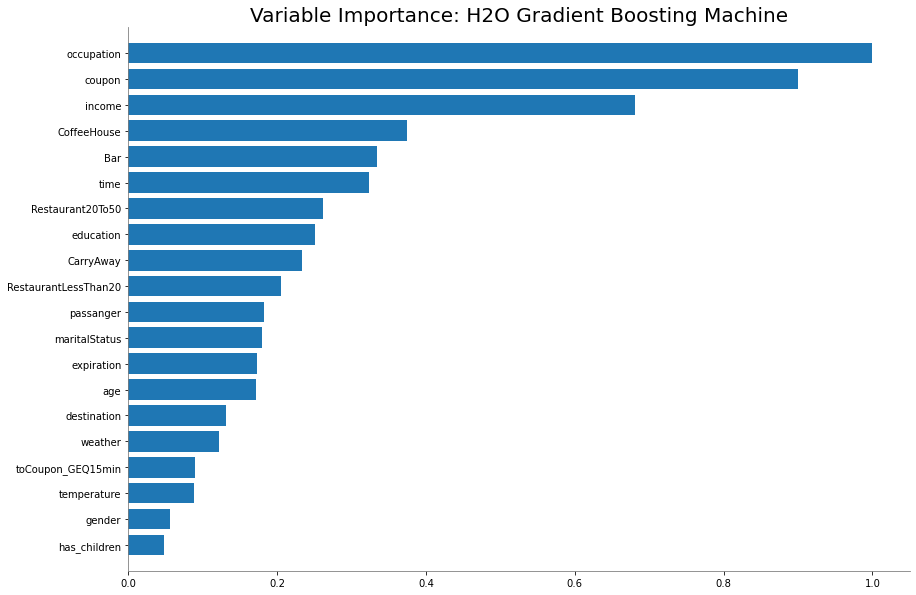

<Figure size 432x288 with 0 Axes>

In [18]:
# plot the graph for variable importance
model.varimp_plot(num_of_features = 20)

In [19]:
# SAVE THE BASELEARNER MODEL
model_path = h2o.save_model(model = model, force = True) 

In [20]:
print("Gini Index:", result.gini())
print("F1:", result.F1())
print("Accuracy:", result.accuracy())

Gini Index: 0.6706218879727694
F1: [[0.41531184205768223, 0.805795847750865]]
Accuracy: [[0.5379210067970494, 0.7668173358149428]]


- The two values for F1 and Accuracy are threshold and metric value itself.
- Eg. for accuracy, predicted value above 0.53 would be labelled 1, else zero.
- Therefore, accuracy of the leader model (Gradient Boosting) by H2O is 0.7668 with a F1 score of 0.80